# Regresión lineal univariable #

## Predicción de precios de casas con la implementación de un modelo de regresión lineal ###

El presente proyecto consiste en realizar un modelo de de regresión lineal univariable para la predicción de precios de apartamentos. La implementación del modelo será totalmente manual.


### Modelo de regresión lineal ###

Un modelo de regresión lineal busca encontrar la ecuación lineal que minimice el error cuadrado medio.

La ecuación lineal:

$f(x) = y = mx + b$

donde: 

* $y$ : Variable dependiente
* $x$ : Variable independiente
* $m$ : Pendiente
* $b$ : Intercepto

Función de costo:

$f(m,b) = \frac{1}{2} \sum_{i=1}^{n} (y_{i} − (mx_{i}+b))^2$

donde:

* $y_{i}$ : Valor real de cada dato en el dataset
* $mx_{i}+b$ : Valor predecido por el modelo

Para poder optimizar este modelo es necesario encontrar los valores de $m$ y $b$ que minimizan la función de costo.
Esto se realiza a través de un aprendizaje por medio de *gradient descent*.

<img src="regresionlineal.png"
     alt="regresionlineal"
     style="float: left; margin-right: 10px;" />




In [7]:
# Importación de librerías a utilizar

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sb

In [4]:
#Cargar dataset

df = np.load('proyecto_training_data.npy')

#Convertir dataset en un DataFrame de Pandas

df = pd.DataFrame(data = df, columns = ["SalePrice", "OverallQual","1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"])

#Información básica de dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
SalePrice       1460 non-null float64
OverallQual     1460 non-null float64
1stFlrSF        1460 non-null float64
TotRmsAbvGrd    1460 non-null float64
YearBuilt       1460 non-null float64
LotFrontage     1201 non-null float64
dtypes: float64(6)
memory usage: 68.5 KB


In [5]:
#Conversión de todos los datos excepto LotFrontage a tipo int

df = df.astype({"SalePrice" : int, "OverallQual" : int, "1stFlrSF" : int, "TotRmsAbvGrd" : int, "YearBuilt" : int})

#Preview de dataframe

df.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500,7,856,8,2003,65.0
1,181500,6,1262,6,1976,80.0
2,223500,7,920,6,2001,68.0
3,140000,7,961,7,1915,60.0
4,250000,8,1145,9,2000,84.0


El dataframe, como se puede observar en la salida de las celdas anteriores, se compone de 5 variables independientes, y 1 variable dependiente (SalePrice). 

In [6]:
#Split de datos de entrenamiento y test

#Random seed para reproducibilidad de los resultados

np.random.seed(42)

# Shuffle de datos
df = df.sample(frac=1)

#Training and test split
train = int(0.8 * len(df))

dftrain = df[:train]

dftest = df[:-train]

print('Longitud de set de entrenamiento: ',len(dftrain), ', Longitud de set de prueba: ', len(dftest))

Longitud de set de entrenamiento:  1168 , Longitud de set de prueba:  292


In [338]:
#Análisis exploratorio de datos

for i in range(6):
    x = np.array(df.iloc[:,[i]])
    x = x[~np.isnan(x)]
    print("Media de ", list(df.iloc[[],[i]]), "es" ,np.mean(x))
    print("Valor maximo de ", list(df.iloc[[],[i]]), "es" ,np.max(x))
    print("Valor mínimo de  ", list(df.iloc[[],[i]]), "es" ,np.min(x))
    print("Rango de ", list(df.iloc[[],[i]]), "es" ,np.max(x)-np.min(x))
    print("Desviación estándar de  ", list(df.iloc[[],[i]]), "es" ,np.std(x))
    print("**************************************************************************************************")


Media de  ['SalePrice'] es 180921.19589041095
Valor maximo de  ['SalePrice'] es 755000
Valor mínimo de   ['SalePrice'] es 34900
Rango de  ['SalePrice'] es 720100
Desviación estándar de   ['SalePrice'] es 79415.29188606751
**************************************************************************************************
Media de  ['OverallQual'] es 6.0993150684931505
Valor maximo de  ['OverallQual'] es 10
Valor mínimo de   ['OverallQual'] es 1
Rango de  ['OverallQual'] es 9
Desviación estándar de   ['OverallQual'] es 1.3825228366585955
**************************************************************************************************
Media de  ['1stFlrSF'] es 1162.626712328767
Valor maximo de  ['1stFlrSF'] es 4692
Valor mínimo de   ['1stFlrSF'] es 334
Rango de  ['1stFlrSF'] es 4358
Desviación estándar de   ['1stFlrSF'] es 386.45532230228963
**************************************************************************************************
Media de  ['TotRmsAbvGrd'] es 6.517808219178082
Va

### Histogramas de variables
A continuación se presentan los histogramas de todas las variables del dataframe a manera de visualizar las medidas de resumen calculadas en la celda anterior:

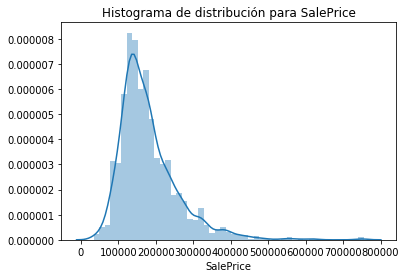

In [339]:
#Histograma para SalePrice

sb.distplot(df["SalePrice"]).set_title("Histograma de distribución para SalePrice")
plt.show()

Como se puede observar en el anterior histograma de la variable ``` SalePrice ```, esta sigue una distribucion visualmente normal, con un sesgo hacia la derecha por los datos extremos encontrados al final de la distribución.

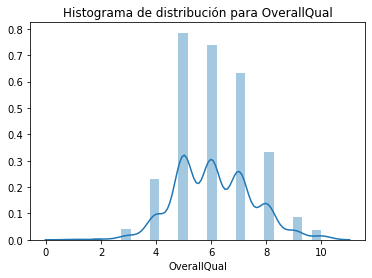

In [340]:
#Histograma para OverwallQual

sb.distplot(df["OverallQual"]).set_title("Histograma de distribución para OverallQual")
plt.show()

Se observa una distribución de ```OverallQual``` variable numérica discreta, por lo cual el histograma presenta esos espacios discontinuos. Se observa que sigue una distribución aproximadamente normal, con una media situada en 5. 

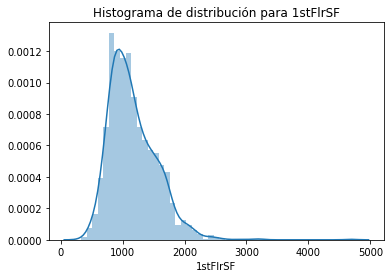

In [341]:
#Histograma para 1stFlrSF

sb.distplot(df["1stFlrSF"]).set_title("Histograma de distribución para 1stFlrSF")
plt.show()

Para la variable ```1stFlrSF ``` se observa una distribución aproximadamente normal, con un sesgo hacia la derecha por varios datos extremos superiores presentados.

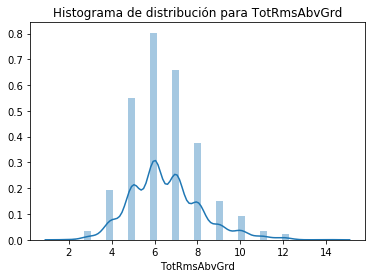

In [342]:
#Histograma para TotRmsAbvGrd
sb.distplot(df["TotRmsAbvGrd"]).set_title("Histograma de distribución para TotRmsAbvGrd")
plt.show()

La variable ``` TotRomsAbvGrd ```  es numérica discreta, razón por la cual se ven las barras discontinuas en el histograma. Ésta sigue una distribución normal, con una media situada en 6. 

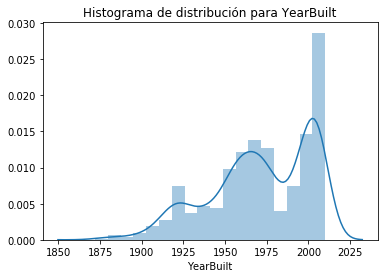

In [343]:
#Histograma para YearBuilt

sb.distplot(df["YearBuilt"]).set_title("Histograma de distribución para YearBuilt")
plt.show()

La variable ``` Year Built ``` no sigue una distribución normal, se puede observar que la mayoría de las casas se construyeron en un año específico, tras el que no hay ningun otro registro en el set de datos.

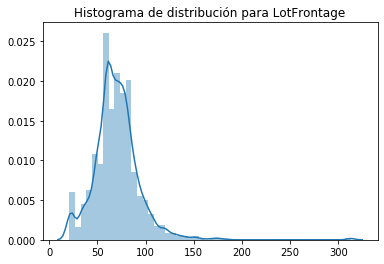

In [344]:
#Histograma para LotFrontage

x = np.array(df["LotFrontage"])
x = x[~np.isnan(x)]


sb.distplot(x).set_title("Histograma de distribución para LotFrontage")
plt.show()

El histograma para la variable ``` LotFrontage ``` se observa que sigue una distribución aproximadamente normal, con un sesgo hacia la derecho, por la presencia de un número pequeño de datos extremos.

### Gráficos de dispersión de variables independientes vs SalePrice

A continuación se presentan los gráficos de dispersión para las variables independientes del dataset y la variable ```SalePrice```, a manera de visualizar cuál de las variables es candidata para ser la variable explicativa en nuestro modelo de regresión lineal. En el título de cada una de las gráficas se presenta el coeficiente de correlación de Pearson.


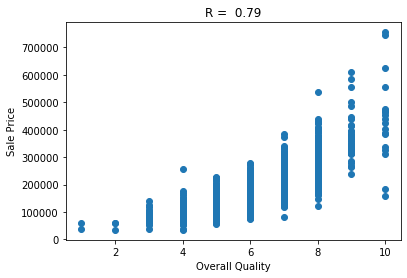

In [142]:
#Coeficiente correlación y scatter plot para OverallQual vs SalePrice

corr = round(df['SalePrice'].corr(df['OverallQual']),2)
title = "R =  " + str(corr)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df["OverallQual"], df["SalePrice"])
ax.set_xlabel("Overall Quality")
ax.set_ylabel("Sale Price")
ax.set_title(title)
plt.show()


La correlación entre la variable ```OverallQual``` y ```SalePrice``` se observa a pesar de que Overall Quality es una variable numérica discreta. El coeficiente de correlación es de $0.79$, un valor alto.

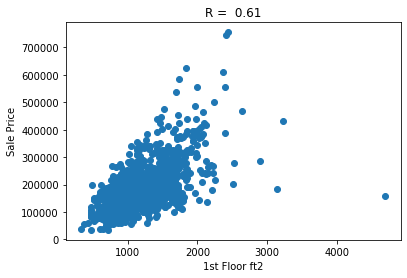

In [143]:
#Coeficiente correlación y scatter plot para 1stFlrSF vs SalePrice

corr = round(df['SalePrice'].corr(df['1stFlrSF']),2)
title = "R =  " + str(corr)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df["1stFlrSF"], df["SalePrice"])
ax.set_xlabel("1st Floor ft2")
ax.set_ylabel("Sale Price")
ax.set_title(title)
plt.show()

El coeficiente de correlación entre ```1stFlrSF``` y ```SalePrice``` es $0.61$, un valor que es alto. En el diagrama de dispersión se observa un dato atípico al resto de los datos. por esto se excluirá para verificar si esto podría aumentar la correlación lineal entre las variables.

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
1298   160000.0         10.0    4692.0          12.0     2008.0        313.0


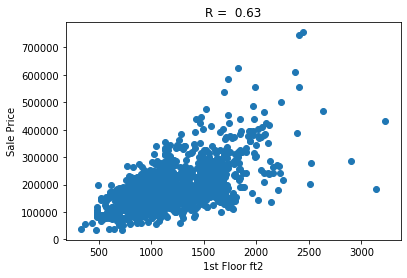

In [10]:
#Coeficiente correlación y scatter plot para 1stFlrSF vs SalePrice omitiendo un punto extremo de la variable 1stFlrSF

outlier = df.loc[df['1stFlrSF'] == np.max(df['1stFlrSF'])]
print(outlier)
df1 = df.drop([1298])

#Se crea dataset nuevo para utilizar en el entrenamiento del 
train1 = int(0.8 * len(df1))
df1train = df1[:train1]
df1test = df1[:-train1]


corr = round(df1['SalePrice'].corr(df1['1stFlrSF']),2)
title = "R =  " + str(corr)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df1["1stFlrSF"], df1["SalePrice"])
ax.set_xlabel("1st Floor ft2")
ax.set_ylabel("Sale Price")
ax.set_title(title)
plt.show()


Efectivamente como se planteó, al remover ese dato atípico $R$ aumentó a $0.63$.

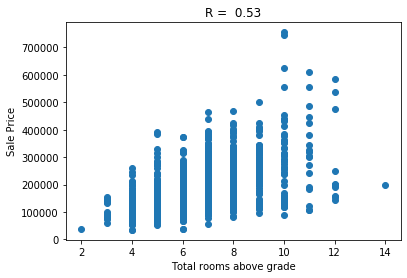

In [144]:
#Coeficiente correlación y scatter plot para TotRmsAbvGrd vs SalePrice

corr = round(df['SalePrice'].corr(df['TotRmsAbvGrd']),2)
title = "R =  " + str(corr)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df["TotRmsAbvGrd"], df["SalePrice"])
ax.set_xlabel("Total rooms above grade")
ax.set_ylabel("Sale Price")
ax.set_title(title)
plt.show()

Para las variables ```TotRmsAbvGrd``` y ```SalePrice```, se puede observar en el diagrama de dispersión que existe una correlación moderada entre las variables, con un $R$ de $0.53$.

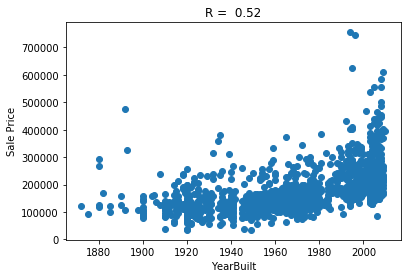

In [5]:
#Coeficiente correlación y scatter plot para YearBuilt vs SalePrice

corr = round(df['SalePrice'].corr(df['YearBuilt']),2)
title = "R =  " + str(corr)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df["YearBuilt"], df["SalePrice"])
ax.set_xlabel("YearBuilt")
ax.set_ylabel("Sale Price")
ax.set_title(title)
plt.show()

Para la variable ```YearBuilt``` se observa que no existe una correlación significativa entre ambas variables, y parecieran no tener una relación lineal, si no una polinomial de grado 2. Esto puede deberse a la distribución no normal del año en el que la mayoría de casas fueron construidas.

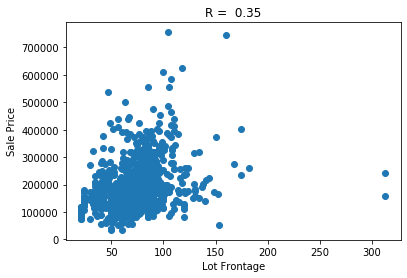

In [146]:
#Coeficiente correlación y scatter plot para LotFrontage vs SalePrice

corr = round(df['SalePrice'].corr(df['LotFrontage']),2)
title = "R =  " + str(corr)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df["LotFrontage"], df["SalePrice"])
ax.set_xlabel("Lot Frontage")
ax.set_ylabel("Sale Price")
ax.set_title(title)
plt.show()

### Variables a utilizar para el modelo de regresión lineal ###

Según el análisis exploratorio de datos las variables que se utilizarán para crear los modelos de regresión lineal son:
* ```1stFlrSF``` con un $R = 0.63$
* ```OverallQual``` con un $R = 0.79$

Para la variable ```1stFlrSF``` se decidió quitar un outlier, con lo cual el valor de $R$ incrementó de $0.61$ a $0.63$.

Se utilizará el dataframe sin el valor extremo para hacer el modelo de `1stFlrSF` vs. `SalePrice`.

### Entrenamiento de modelo de regresión lineal mediante ***gradient descent***

El modelo de regresión lineal se entrenará utilizando la siguiente función de costo. El algoritmo de gradient descent calcula la derivada parcial para cada uno de los parámetros de la función de costo. En cada iteración se realiza una modificación pequeña proporcional a esas derivadas parciales calculadas. A continuación se presenta este concepto en notación matemática.


Función de costo:

$f(m,b) = \frac{1}{2n} \sum_{i=1}^{n} (y_{i} − (mx_{i}+b))^2$

donde:

* $y_{i}$ : Valor real de cada dato en el dataset
* $mx_{i}+b$ : Valor predecido por el modelo

Derivadas parciales:

$\frac{\partial m }{\partial f} = \frac{1}{n} \sum_{i=1}^{n} (y_{i} − (mx_{i}+b))*m$

$\frac{\partial b }{\partial f} = \frac{1}{n} \sum_{i=1}^{n} (y_{i} − (mx_{i}+b))$

*Gradient descent*:

$m = m - \alpha \frac{1}{n} \sum_{i=1}^{n} ((y_{i} − (mx_{i}+b))*m)$

$b = b - \alpha \frac{1}{n} \sum_{i=1}^{n} (y_{i} − (mx_{i}+b))$

$\alpha$ = tasa de aprendizaje

Los valores de $m$ y $b$ son actualizados iterativamente hasta minimizar el error, en otras palabras, hasta encontrar la línea de regresión que minimiza el error entre los datos predecidos y los datos reales.




In [8]:
#Función para entrenar modelo de regresión lineal univariable manualmente

def LinRegression(x,y,epochs,lr, imprimir_error_cada):
    y = np.array(y)
    matrix = np.array([x, np.ones_like(x)], dtype = "float64")
    matrixt = np.transpose(matrix)
    m = 0
    b = 0
    parameters = np.array([m,b], dtype = "float64")
    errorlist = []
    parameterdict = {}
    for i in range(0,epochs+1):
        yhat = np.dot(matrixt, parameters)
        error = 1/2* ( np.mean((yhat - y)**2))
        errorlist.append(error)
        gradients = (np.array(yhat-y, dtype = "float64")* matrix).mean(1)
        parameters = parameters - (lr*gradients)
        parameterdict[i+1] = parameters 
        if i%imprimir_error_cada == 0 :
            print("Epoch: ", i, "Error: ",error)
    return errorlist, parameterdict

Epoch:  0 Error:  19683643360.552227
Epoch:  250000 Error:  1481198157.3758767


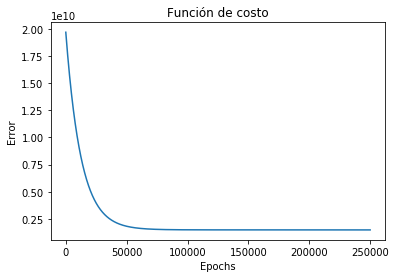

In [333]:
#Función para graficar aprendizaje de modelo de regresión lineal
#Se muestra reducción en el valor de función de costo según épocas
def plotloss(x,y, epochs, lr,printinterval):
    xvar,yvar = LinRegression(x,y,epochs,lr,printinterval)
    plt.plot(np.linspace(0,len(yvar),len(yvar)),xvar)
    plt.title("Función de costo")
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.show()
    
    
#Evolucion de funcion de costo para modelo de regresion lineal para la variable OverallQual
plotloss(dftrain['OverallQual'], dftrain['SalePrice'], 250000, 0.000001, 250000)
    
    

En esta gráfica se observa el decaímiento del error conforme se entrena el modelo por más epocas. Esta gráfica corresponde para el modelo entrenado con la variable `OverallQual` como variable independiente. 

Epoch:  0 Error:  19689541940.981148
Epoch:  100 Error:  2037096519.6891594


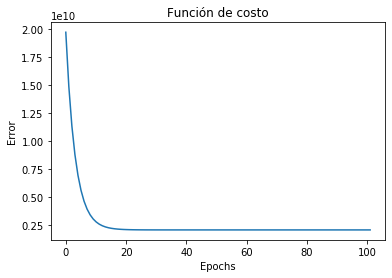

In [334]:
#Evolucion de funcion de costo para modelo de regresion lineal para la variable 1stFlrSF
plotloss(df1train['1stFlrSF'], df1train['SalePrice'], 100, 0.0000001, 100)

En esta gráfica se observa el decaímiento del error conforme se entrena el modelo por más epocas. Esta gráfica corresponde para el modelo entrenado con la variable `1stFlrSF` como variable independiente.

In [335]:
#Funcion para graficar la linea que minimiza el error cuadratico medio por epocas de entrenamiento

def plotregression(x,y,dictionary, n):
    x1 = np.linspace(0,np.max(x)+1,100)
    for i in range(0,len(dictionary),n):
        fx = dictionary[i+1][0] * x1 + dictionary[i+1][1]
        plt.scatter(x,y)
        plt.plot(x1,fx, 'r')
        plt.title("Epoch: " + str(i))
        plt.xlabel(str(x.name))
        plt.ylabel(str(y.name))
        plt.show()

In [322]:
#Entrenamiento de modelo de regresion lineal de OverallQual vs SalePrice

x, y = LinRegression(dftrain['OverallQual'], dftrain['SalePrice'], 5000000, 0.000001, 1000000)

Epoch:  0 Error:  19683643360.552227
Epoch:  1000000 Error:  1462727969.2560902
Epoch:  2000000 Error:  1440125324.6422784
Epoch:  3000000 Error:  1419637275.6081088
Epoch:  4000000 Error:  1401065990.6811242
Epoch:  5000000 Error:  1384232146.557457


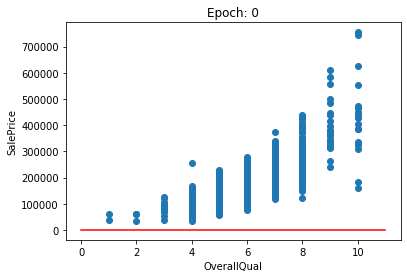

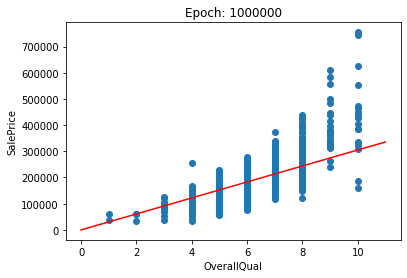

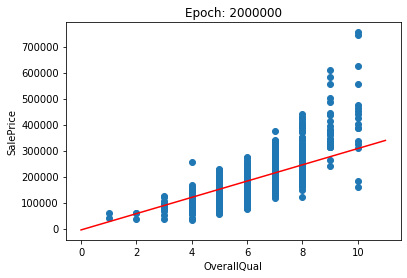

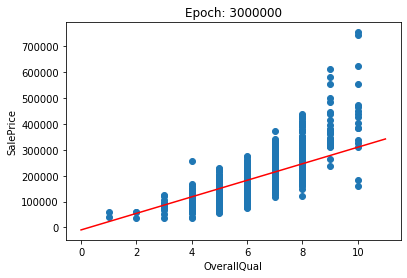

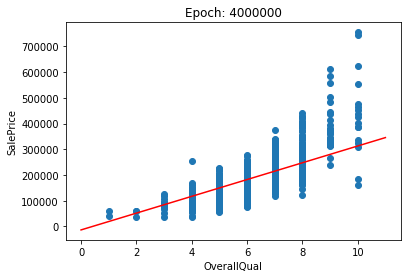

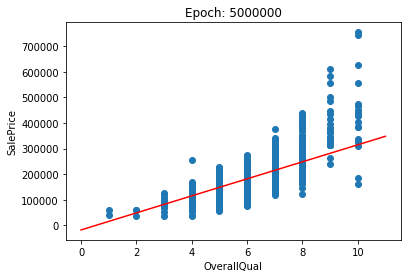

In [329]:
#Grafica de regresion lineal en epocas de entrenamiento para modelo de OverallQual vs SalePrice
plotregression(dftrain['OverallQual'], dftrain['SalePrice'],y, 1000000)

En las gráficas anteriores se observan los gráficos de dispersión y la línea de regresión generada en cada iteración del proceso de entrenamiento. Se observa como la gráfica tiene un cambio muy poco significativo después de las primeras 1,000,000 iteraciones de entranemiento.

In [11]:
#Entrenamiento de modelo de regresion lineal de 1stFlrSF vs SalePrice

x2, y2 = LinRegression(df1train['1stFlrSF'], df1train['SalePrice'], 100, 0.0000001, 10)

Epoch:  0 Error:  19413531155.238216
Epoch:  10 Error:  2682908212.84147
Epoch:  20 Error:  1998674853.2350435
Epoch:  30 Error:  1970691710.0961173
Epoch:  40 Error:  1969547273.8445985
Epoch:  50 Error:  1969500461.8975203
Epoch:  60 Error:  1969498539.56151
Epoch:  70 Error:  1969498453.0787833
Epoch:  80 Error:  1969498441.6770666
Epoch:  90 Error:  1969498433.3459442
Epoch:  100 Error:  1969498425.1404016


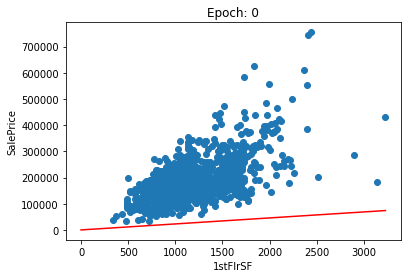

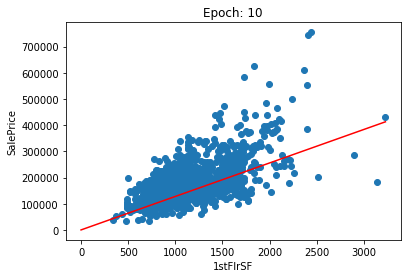

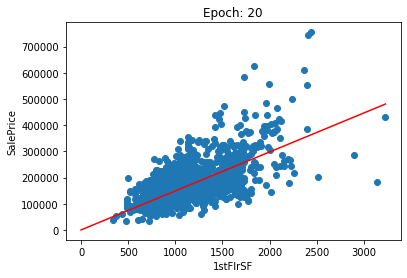

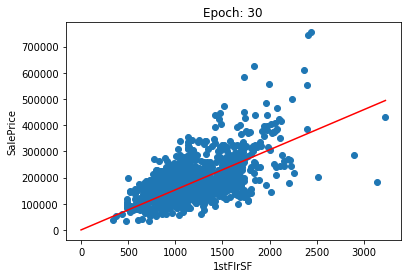

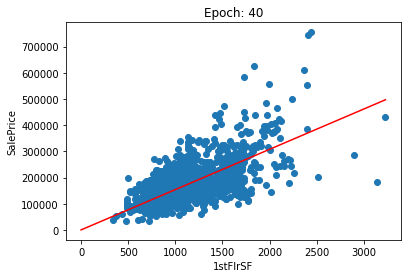

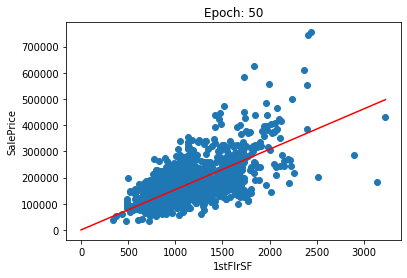

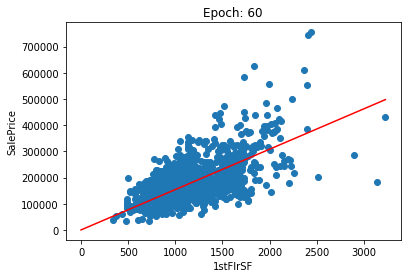

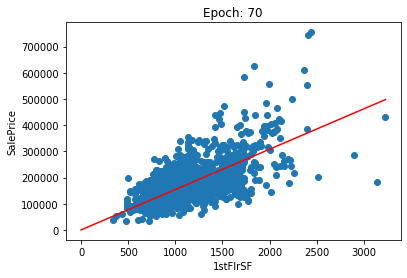

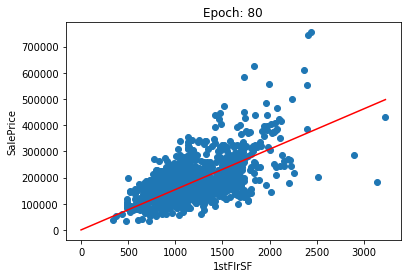

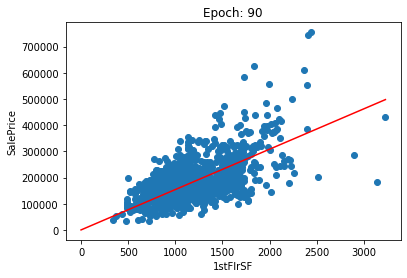

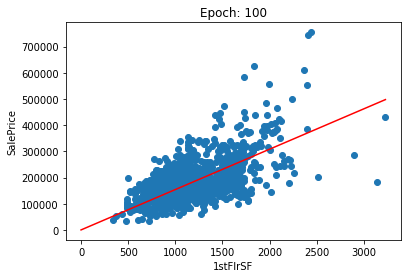

In [233]:
#Grafica de regresion lineal en epocas de entrenamiento para modelo de 1stFlrSF vs SalePrice
plotregression(df1train['1stFlrSF'], df1train['SalePrice'],y2, 10)

A diferencia de las gráficas de entrenamiento para el modelo que utilizó `OverallQual` como la variable independiente, en el modelo con `1stFlrSF`, se puede observar con más detalle cómo la linea de regresión lineal se va minimizando conforme avanza el proceso de entrenamiento.

### Comparación de modelo manual vs modelo de *Scikit-learn* 

Para la finalización de este proyecto se hace una comparación del rendimiento del modelo entrenado manualmente mediante ***gradient descent*** y el modelo entrenado mediante el paquete ***Scikit-learn***.

In [328]:
#Entrenamiento de modelo de Regresion Lineal de Scikit-learn para OverallQual vs SalePrice
OverallQual = pd.DataFrame(dftrain['OverallQual'])
SalePrice = pd.DataFrame(dftrain['SalePrice'])

regOverallQual = LinearRegression().fit(OverallQual,SalePrice)


In [234]:
#Entrenamiento de modelo de Regresion Lineal de Scikit-learn para 1stFlrSF vs SalePrice
FirstFlrSF = pd.DataFrame(df1train['1stFlrSF'])
SalePrice = pd.DataFrame(df1train['SalePrice'])

reg1stFlrSF = LinearRegression().fit(FirstFlrSF,SalePrice)

In [324]:
#Funcion para calcular las predicciones de ambos modelos y un promedio

def predictions(sklearnmodel, manualmodel, xtest):
    skpredict = sklearnmodel.predict(pd.DataFrame(xtest))
    skpredict = skpredict.transpose()
    skpredict = np.reshape(skpredict, 292)
    manualmodelpredict = np.array(manualmodel[len(manualmodel)][0] * xtest + manualmodel[len(manualmodel)][1])
    promedio = (skpredict + manualmodelpredict)
    
    return skpredict, manualmodelpredict, promedio

In [336]:
#Predicciones para OverallQual vs SalePrice
predOverallQualSk, predOverallQualManual, promedio = predictions(regOverallQual, y, dftest['OverallQual'])

#Predicciones para 1stFlrSF vs SalePrice
pred1stFlrSFSk, pred1stFlrSFManual, promedio = predictions(reg1stFlrSF, y2, df1test['1stFlrSF'])

#Funcion para calcular error
def CalculateError(yhat, y):
    error = 1/2*(np.mean((yhat - y)**2))
    return error

# Calculo de error para cada uno de los modelos
ErrorSkOverallQual = CalculateError(predOverallQualSk, dftest['SalePrice'])

ErrorManualOverallQual = CalculateError(predOverallQualManual, dftest['SalePrice'])

ErrorSk1stFlrSF = CalculateError(pred1stFlrSFSk, df1test['SalePrice'])

ErrorManual1stFlrSF = CalculateError(pred1stFlrSFManual, df1test['SalePrice'])

#Creacion de listas con los valores de error para cada uno de los modelos
SKerrors = [ErrorSkOverallQual, ErrorSk1stFlrSF]

Manualerrors = [ErrorManualOverallQual,ErrorManual1stFlrSF]

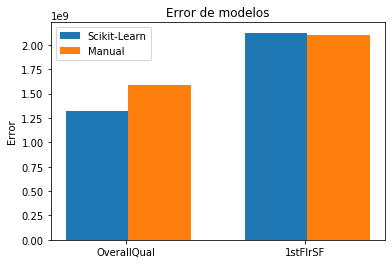

In [337]:
#Grafica de barras para comparacion de error de modelos

fig, ax = plt.subplots()
width = 0.35
r1 = np.arange(len(SKerrors))
r2 = [x + width for x in r1]

bars1 = ax.bar(r1, SKerrors, width, label='Scikit-Learn')
bars2 = ax.bar(r2, Manualerrors, width, label='Manual')

ax.set_ylabel('Error')
ax.set_title('Error de modelos')
ax.set_xticks(r1+0.16)
ax.set_xticklabels(('OverallQual', '1stFlrSF'))
ax.legend()

plt.show()

### Modelos seleccionados

Después de realizar el entrenamiento del modelo de regresión lineal manual, y el modelo por medio de Scikit-Learn, se obtuvieron los errores asociados a las gráficas de arribas al momento de hacer la validación con el set de datos de prueba.

Para la variable OverallQual: 
* El modelo de regresion lineal manual rápidamente disminuye el error de manera significativa, sin embargo, cada época siguiente de entrenamiento después de las 10,000 épocas nos da una reducción muy pequeña en la cantidad de error del modelo. A pesar de que se entrenó el modelo por 5000000 épocas, la reducción de error no alcanzó a la del modelo de Scikit-Learn.
* El modelo a utilizar para esta variable es preferiblemente el modelo de **Scikit-learn**.

Para la variable 1stFlrSF:
* Primero, se puede observar como el error no puede disminuirse hasta el mismo grado que para la otra variable. Esto está relacionado directamente a que el coeficiente de correlación de esta variable es menor que para la variable OverallQual.
* El rendimiento de ambos modelos es muy parecido a pesar que el modelo manual fue entrenado por únicamente 100 épocas.
* Finalmente, el **modelo manual** supera ligeramente al modelo de Scikit-learn en la minimización del error, por lo que es el modelo que se debería de utilizar para esta variable.


## Conclusiones ##

* El haber utilizado un método de scaling para la variable ``SalePrice`` podría haber optimizado el proceso de entrenamiento, al permitirnos utilizar un learning rate más alto sin tener que incuirrir en numerical overflow en python.
* Un modelo de regresión lineal entrenado mediante ***gradient descent*** puede tener un rendimiento igual que un modelo entrenado por ***Scikit-learn***.
* La implementación de código vectorizado permite realizar las operaciones aritméticas necesarias para el algoritmo de entrenamiento de una manera más eficiente.